<a href="https://colab.research.google.com/github/ehcdc1967/Proyectos-de-Inversion/blob/main/20250119_Untitled_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (classification_report, roc_auc_score, roc_curve)
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
# Cargar el dataset
url = 'https://raw.githubusercontent.com/ehcdc1967/Proyectos-de-Inversion/main/poblacion.parquet'
df = pd.read_parquet(url)

In [ ]:
# Preprocesamiento de datos
df.drop(columns=['CODIGO_UNICO'], inplace=True, errors='ignore')
df.dropna(inplace=True)

In [ ]:
# Elimino las columnas irrelevantes y maneje los valores faltantes
df.dropna(inplace=True)

In [ ]:
# One-Hot Encoding para variables categóricas
df = pd.get_dummies(df, columns=['FUNCION', 'DPTO', 'TIPO_MUNICIPALIDAD'], drop_first=True)
df = df.drop(columns=['CODIGO_UNICO'], errors='ignore')

In [ ]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['SOBRECOSTO'], errors='ignore')
y = df['SOBRECOSTO']

In [ ]:
# Dividir datos en conjuntos de entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split( X , y , test_size=0.2 , random_state=2024 )

In [ ]:
# Estandarizar variables
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
# Balanceo de clases y estandarización
pipeline = Pipeline([
     ('scaler'      , StandardScaler())
    ,('oversampler' , RandomOverSampler(random_state=2024))
    ,('classifier'  , RandomForestClassifier(random_state=2024))
])

# Cross-validation

In [ ]:
k=20

In [ ]:
# Validación cruzada en el conjunto de entrenamiento
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=k, scoring='accuracy')
print(f'Resultados de validación cruzada ({k} folds): {cv_scores}')
print(f'Precisión media en validación cruzada: {cv_scores.mean():.4f}')

Resultados de validación cruzada (20 folds): [0.98520992 0.98854962 0.98615752 0.98806683 0.98377088 0.98663484
 0.98615752 0.9823389  0.98711217 0.98663484 0.98854415 0.97947494
 0.98281623 0.98615752 0.98615752 0.98949881 0.98377088 0.98520286
 0.98424821 0.98663484]
Precisión media en validación cruzada: 0.9857


In [ ]:
# Entrenamiento en el conjunto de entrenamiento balanceado
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('oversampler', RandomOverSampler(random_state=2024)),
                ('classifier', RandomForestClassifier(random_state=2024))])

In [ ]:
# Predicción en el conjunto de prueba
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluación del modelo
accuracy = pipeline.score(X_test, y_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Mostrar resultados
print("Accuracy en conjunto de prueba:", accuracy)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", class_report)


Accuracy en conjunto de prueba: 0.983295150820924
ROC AUC: 0.9985242486285607
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7801
         1.0       0.98      0.95      0.97      2675

    accuracy                           0.98     10476
   macro avg       0.98      0.97      0.98     10476
weighted avg       0.98      0.98      0.98     10476



In [ ]:
# Importancia de características
classifier = pipeline.named_steps['classifier']
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [ ]:
# Importancia de características
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)


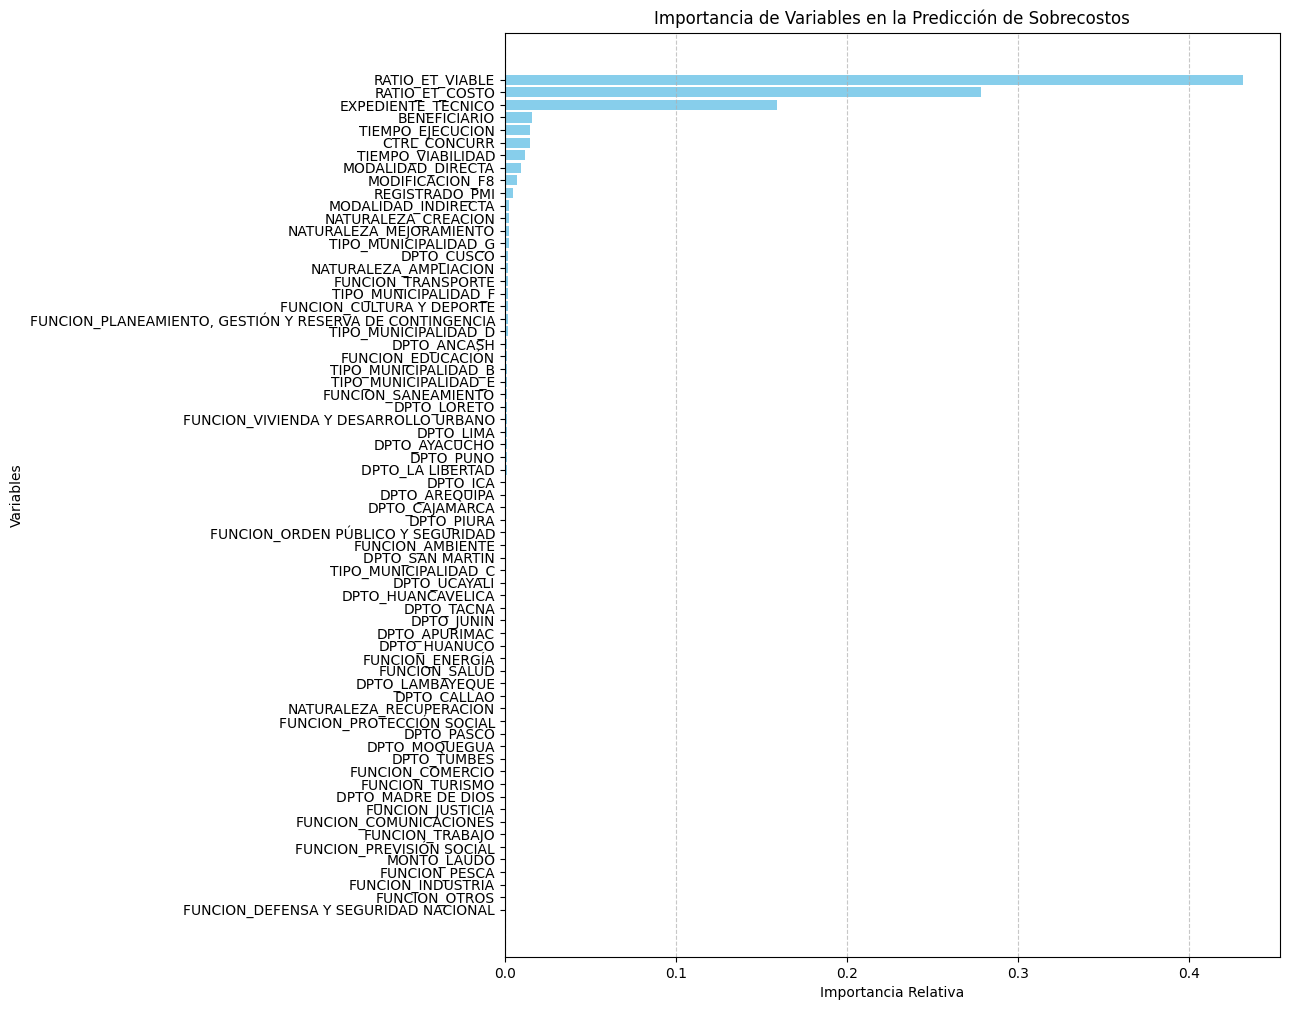

In [ ]:
# Gráfico de importancia de características
plt.figure(figsize=(10, 12))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importancia Relativa')
plt.ylabel('Variables')
plt.title('Importancia de Variables en la Predicción de Sobrecostos')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

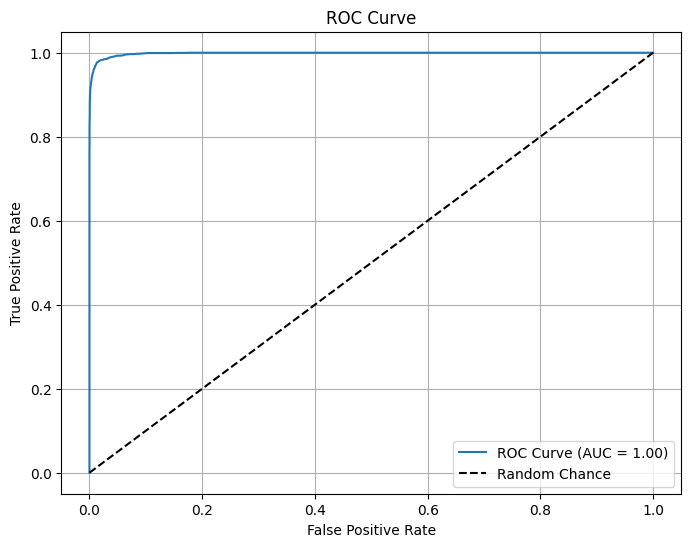

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()
